In [ ]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import pandas as pd
import random
import numpy as np
import pandas as pd

In [ ]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
fetch_tweets=tweepy.Cursor(api.search, q="#unitedAIRLINES",count=1000, lang ="en",since="2016-9-13", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [ ]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    temp_df = pd.DataFrame([[data["Date"].iloc[index], 
                            my_new_string]], columns = ['Date','Tweets'])
    cdata = pd.concat([cdata, temp_df], axis = 0).reset_index(drop = True)

In [ ]:
cdata

,Date,Tweets
0,2022-09-13,RT panasebas2 Its fun playing games with frien...
1,2022-09-13,Its fun playing games with friends mobilegame ...
2,2022-09-13,Its sad that we have become a society where no...
3,2022-09-13,ICAO A59601Flt UAL982 UnitedAirlines IADATHFir...
4,2022-09-13,ICAO A43E5BFlt UAL1945 UnitedAirlines SEASFOFi...
...,...,...
552,2022-09-04,RT diecastryan An AmericanAir A320 taking off ...
553,2022-09-04,RT diecastryan An AmericanAir A320 taking off ...
554,2022-09-04,RT diecastryan An AmericanAir A320 taking off ...
555,2022-09-04,Just play AndroidGameplay NewGame onlinegaming...


In [ ]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [ ]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        temp_df = pd.DataFrame([[get_date, 
                                get_tweet]], columns = ['Date','Tweets'])
        ccdata = pd.concat([ccdata, temp_df], axis = 0).reset_index(drop = True)
        get_tweet=" "

In [ ]:
ccdata

,Date,Tweets
0,2022-09-13,RT panasebas2 Its fun playing games with frien...
1,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...
2,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...
3,2022-09-10,RT JaspreetTravels Long exposure from my roof...
4,2022-09-09,ICAO ABA30BFlt UAL694 UnitedAirlines SFOKOAFi...
5,2022-09-08,United Airlines Invests an Additional 15 Mill...
6,2022-09-07,What do you do to amuse yourself in this game...
7,2022-09-06,It is the most anticipated game in history o...
8,2022-09-05,That alone makes me want to play this game an...


In [ ]:
read_stock_p=pd.read_csv('recent_tweet.csv')
# DOWNLOAD UPDATED CLOSE PRICE FROM https://finance.yahoo.com/quote/UAL/history?period1=1598918400&period2=1632268800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-06,35.820000,36.730000,35.279999,36.580002,36.580002,10468400
1,2022-09-07,36.849998,38.720001,36.750000,38.599998,38.599998,11802600
2,2022-09-08,38.099998,39.540001,37.930000,38.880001,38.880001,10188000
3,2022-09-09,39.360001,39.610001,39.040001,39.259998,39.259998,7405000


In [ ]:
ccdata['Prices']=""

In [ ]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            # print(get_stock_date," ",get_tweet_date)
            # ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
             ccdata['Prices'].iloc[i] = int(read_stock_p.Close[j])

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-09-13,RT panasebas2 Its fun playing games with frien...,
1,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,
2,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,
3,2022-09-10,RT JaspreetTravels Long exposure from my roof...,
4,2022-09-09,ICAO ABA30BFlt UAL694 UnitedAirlines SFOKOAFi...,39
5,2022-09-08,United Airlines Invests an Additional 15 Mill...,38
6,2022-09-07,What do you do to amuse yourself in this game...,38
7,2022-09-06,It is the most anticipated game in history o...,36
8,2022-09-05,That alone makes me want to play this game an...,


In [ ]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

In [ ]:
ccdata

,Date,Tweets,Prices
0,2022-09-13,RT panasebas2 Its fun playing games with frien...,37
1,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,37
2,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,37
3,2022-09-10,RT JaspreetTravels Long exposure from my roof...,37
4,2022-09-09,ICAO ABA30BFlt UAL694 UnitedAirlines SFOKOAFi...,39
5,2022-09-08,United Airlines Invests an Additional 15 Mill...,38
6,2022-09-07,What do you do to amuse yourself in this game...,38
7,2022-09-06,It is the most anticipated game in history o...,36
8,2022-09-05,That alone makes me want to play this game an...,37


In [ ]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [ ]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-09-13,RT panasebas2 Its fun playing games with frien...,37,,,,
1,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,37,,,,
2,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,37,,,,
3,2022-09-10,RT JaspreetTravels Long exposure from my roof...,37,,,,
4,2022-09-09,ICAO ABA30BFlt UAL694 UnitedAirlines SFOKOAFi...,39,,,,
5,2022-09-08,United Airlines Invests an Additional 15 Mill...,38,,,,
6,2022-09-07,What do you do to amuse yourself in this game...,38,,,,
7,2022-09-06,It is the most anticipated game in history o...,36,,,,
8,2022-09-05,That alone makes me want to play this game an...,37,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata['Comp'].iloc[indexx] = sentence_sentiment['compound']
        ccdata['Negative'].iloc[indexx] = sentence_sentiment['neg']
        ccdata['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        ccdata['Positive'].iloc[indexx] = sentence_sentiment['compound']
        # ccdata.set_value(indexx, 'Comp', sentence_sentiment['pos'])
        # ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        # ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        # ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2022-09-13,RT panasebas2 Its fun playing games with frien...,37,-0.1337,0.06,0.872,-0.1337
1,2022-09-12,RT BNNUS BREAKING FLOTUS JillBiden recalled b...,37,0.9958,0.084,0.782,0.9958
2,2022-09-11,ICAO AC55F3Flt UAL694 UnitedAirlines SFOKOAFi...,37,0.9776,0.036,0.905,0.9776
3,2022-09-10,RT JaspreetTravels Long exposure from my roof...,37,0.9993,0.038,0.807,0.9993
4,2022-09-09,ICAO ABA30BFlt UAL694 UnitedAirlines SFOKOAFi...,39,0.9974,0.021,0.887,0.9974
5,2022-09-08,United Airlines Invests an Additional 15 Mill...,38,0.9991,0.029,0.826,0.9991
6,2022-09-07,What do you do to amuse yourself in this game...,38,0.9996,0.059,0.754,0.9996
7,2022-09-06,It is the most anticipated game in history o...,36,0.9994,0.026,0.79,0.9994
8,2022-09-05,That alone makes me want to play this game an...,37,0.9913,0.075,0.813,0.9913


% of positive tweets=  88.88888888888889
% of negative tweets=  11.11111111111111


[]

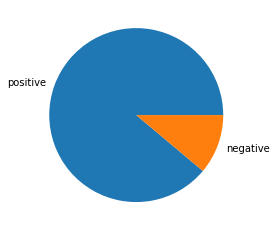

In [ ]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [ ]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2022-09-13,37,-0.1337,0.06,0.872,-0.1337
1,2022-09-12,37,0.9958,0.084,0.782,0.9958
2,2022-09-11,37,0.9776,0.036,0.905,0.9776
3,2022-09-10,37,0.9993,0.038,0.807,0.9993
4,2022-09-09,39,0.9974,0.021,0.887,0.9974
5,2022-09-08,38,0.9991,0.029,0.826,0.9991
6,2022-09-07,38,0.9996,0.059,0.754,0.9996
7,2022-09-06,36,0.9994,0.026,0.79,0.9994
8,2022-09-05,37,0.9913,0.075,0.813,0.9913


In [ ]:
train_start_index = '0'
train_end_index = '5'
test_start_index = '6'
test_end_index = '8'
train = df_.loc[train_start_index : train_end_index,:]
test = df_.loc[test_start_index:test_end_index,:]

In [ ]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_train)

[[ 0.06   -0.1337]
 [ 0.084   0.9958]
 [ 0.036   0.9776]
 [ 0.038   0.9993]
 [ 0.021   0.9974]
 [ 0.029   0.9991]]


In [ ]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [ ]:
print(numpy_df_test)

[[0.059  0.9996]
 [0.026  0.9994]
 [0.075  0.9913]]


In [ ]:
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0      37
1      37
2      37
3      37
4      39
5      38


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [ ]:
prediction = rf.predict(numpy_df_test)
prediction

array([37.17, 38.14, 37.14])

In [ ]:
import matplotlib.pyplot as plt
idx=np.arange(int(test_start_index),int(test_end_index)+1)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])
predictions_df_

,Prices
6,37.17
7,38.14
8,37.14


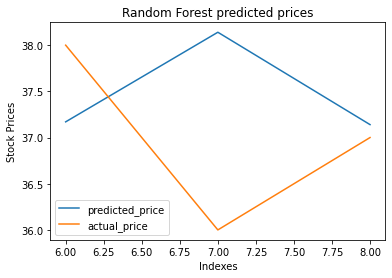

In [ ]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression()

In [ ]:
reg.predict(numpy_df_test)

array([[37.21876339],
       [37.94801917],
       [36.8636446 ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
numpy_df_test
numpy_df_train

array([[ 0.06  , -0.1337],
       [ 0.084 ,  0.9958],
       [ 0.036 ,  0.9776],
       [ 0.038 ,  0.9993],
       [ 0.021 ,  0.9974],
       [ 0.029 ,  0.9991]])

In [ ]:
y_test
y_train

,Prices
0,37
1,37
2,37
3,37
4,39
5,38


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(numpy_df_train, y_train)
y_pred = regressor.predict(numpy_df_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(numpy_df_train, y_train)
predict = model.predict(numpy_df_test)
print(predict)
print(predict.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[37.222 38.168 37.066]
(3,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(numpy_df_train, y_train)
y_pred = clf.predict(numpy_df_test)
from sklearn import metrics
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred)*100,"%")


ACCURACY OF THE MODEL:  33.33333333333333 %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("ACCURACY= ",(rf.score(numpy_df_train,y_train))*100,"%")

ACCURACY=  92.64285714285718 %


In [ ]:
def apply_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    print("The Prediction's generated are\n",ypred)
    print("The Training Score Generated are  ",model.score(x_train,y_train))    
    print("The Testing Score Generated are  ",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,ypred)
    print("The Confusion Matrix is \n",cm)
    print("The Classification Report is \n",classification_report(y_test,ypred))
    mis=(cm[0][1]+cm[1][0])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
    print("Percentage of Misclassification is "+str(mis))

In [ ]:
m3=KNeighborsClassifier(n_neighbors=5)
apply_model(m3,numpy_df_train,numpy_df_test,y_train,y_test)
m3.fit(numpy_df_train,y_train)
ypred = m3.predict(numpy_df_test)
print("The Prediction's generated are\n",ypred)
print("The Training Score Generated are  ",m3.score(numpy_df_train,y_train))    
print("The Testing Score Generated are  ",m3.score(numpy_df_test,y_test))

The Prediction's generated are
 [37 37 37]
The Training Score Generated are   0.6666666666666666
The Testing Score Generated are   0.3333333333333333
The Confusion Matrix is 
 [[0 1 0]
 [0 1 0]
 [0 1 0]]
The Classification Report is 
               precision    recall  f1-score   support

          36       0.00      0.00      0.00         1
          37       0.33      1.00      0.50         1
          38       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

Percentage of Misclassification is 0.5
The Prediction's generated are
 [37 37 37]
The Training Score Generated are   0.6666666666666666
The Testing Score Generated are   0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [ ]:
stocks_dataf = pd.read_pickle('Twitter_Dataset.pkl')
stocks_dataf

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


In [ ]:
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
...,...,...,...
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...


In [ ]:
stocks_dataf = stocks_dataf.reset_index().rename(columns = {'index':'Date'})


In [ ]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['Date','adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

,Date,adj_close_price,Tweets
0,2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
1,2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2,2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
3,2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
4,2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
...,...,...,...
3648,2016-12-27,19945,Should the U.S. Embassy Be Moved From Tel Avi...
3649,2016-12-28,19833,"When Finding the Right Lawyer Seems Daunting,..."
3650,2016-12-29,19819,Does Empathy Guide or Hinder Moral Action?. C...
3651,2016-12-30,19762,Shielding Seized Assets From Corruption’s Clu...


In [ ]:
dataframe = stocks_dataf[['Date','adj_close_price']].copy()
dataframe

,Date,adj_close_price
0,2007-01-01,12469
1,2007-01-02,12472
2,2007-01-03,12474
3,2007-01-04,12480
4,2007-01-05,12398
...,...,...
3648,2016-12-27,19945
3649,2016-12-28,19833
3650,2016-12-29,19819
3651,2016-12-30,19762


In [ ]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

,Date,adj_close_price,Comp,Negative,Neutral,Positive
0,2007-01-01,12469,,,,
1,2007-01-02,12472,,,,
2,2007-01-03,12474,,,,
3,2007-01-04,12480,,,,
4,2007-01-05,12398,,,,
...,...,...,...,...,...,...
3648,2016-12-27,19945,,,,
3649,2016-12-28,19833,,,,
3650,2016-12-29,19819,,,,
3651,2016-12-30,19762,,,,


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in dataframe.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe['Comp'].iloc[indexx] = sentence_sentiment['compound']
        dataframe['Negative'].iloc[indexx] = sentence_sentiment['neg']
        dataframe['Neutral'].iloc[indexx] = sentence_sentiment['neu']
        dataframe['Positive'].iloc[indexx] = sentence_sentiment['compound']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dataframe

,Date,adj_close_price,Comp,Negative,Neutral,Positive
0,2007-01-01,12469,-0.9814,0.159,0.749,-0.9814
1,2007-01-02,12472,-0.8521,0.116,0.785,-0.8521
2,2007-01-03,12474,-0.9993,0.198,0.737,-0.9993
3,2007-01-04,12480,-0.9982,0.131,0.806,-0.9982
4,2007-01-05,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...,...
3648,2016-12-27,19945,-0.9898,0.178,0.719,-0.9898
3649,2016-12-28,19833,-0.9844,0.177,0.704,-0.9844
3650,2016-12-29,19819,-0.9782,0.14,0.761,-0.9782
3651,2016-12-30,19762,-0.995,0.168,0.734,-0.995


% of positive tweets=  44.34711196277033
% of negative tweets=  55.43388995346291


[]

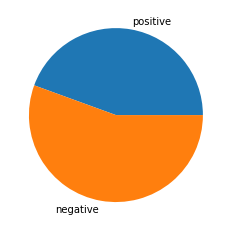

In [ ]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [ ]:
dataframe.index = dataframe['Date']
dataframe

,Date,adj_close_price,Comp,Negative,Neutral,Positive
Date,,,,,,
2007-01-01,2007-01-01,12469,-0.9814,0.159,0.749,-0.9814
2007-01-02,2007-01-02,12472,-0.8521,0.116,0.785,-0.8521
2007-01-03,2007-01-03,12474,-0.9993,0.198,0.737,-0.9993
2007-01-04,2007-01-04,12480,-0.9982,0.131,0.806,-0.9982
2007-01-05,2007-01-05,12398,-0.9901,0.124,0.794,-0.9901
...,...,...,...,...,...,...
2016-12-27,2016-12-27,19945,-0.9898,0.178,0.719,-0.9898
2016-12-28,2016-12-28,19833,-0.9844,0.177,0.704,-0.9844
2016-12-29,2016-12-29,19819,-0.9782,0.14,0.761,-0.9782


In [ ]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.loc[train_data_start : train_data_end]
test = dataframe.loc[test_data_start:test_data_end]

In [ ]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [ ]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [ ]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.291811773229552


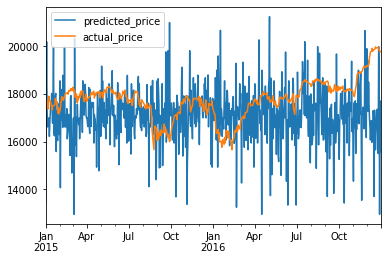

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix
rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


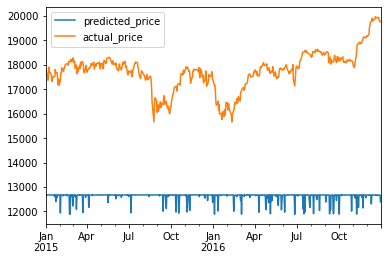

In [ ]:
from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price']
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

0.1


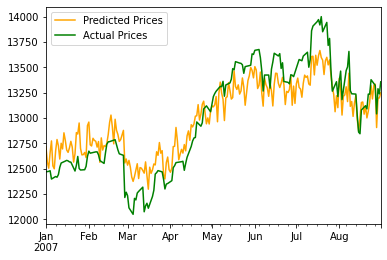

In [ ]:
from sklearn.ensemble import RandomForestRegressor
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.loc[train_data_start : train_data_end]
    test = dataframe.loc[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])
    prediction = rf.predict(numpy_dataframe_test)
    prediction_list.append(prediction)
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']    
    prediction = rf.predict(numpy_dataframe_train)
    idx = pd.date_range(train_data_start, train_data_end)
    predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
    predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
    predictions_dataframe1["Actual Prices"]=train['adj_close_price']
    predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
    predictions_dataframe1.plot(color=['orange','green'])
    print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
    """predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
    predictions_dataframe1.plot(color='orange')
    train['adj_close_price'].plot.line(color='green')"""
    break

0.1


"predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])\npredictions_dataframe1.plot(color='orange')\ntrain['adj_close_price'].plot.line(color='green')"

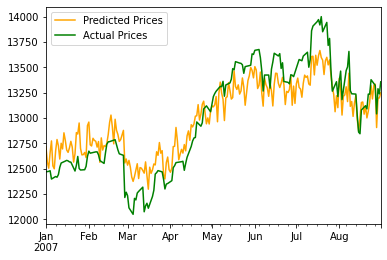

In [ ]:
prediction = rf.predict(numpy_dataframe_train)
#print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
#stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
predictions_dataframe1.plot(color=['orange','green'])
print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
"""predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')"""

In [ ]:
print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")

ACCURACY=  83.42980361179181 %
